# **Time Series**

**Importing packages and setting plots**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [3]:
# URL DATASET
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

# IMPORTING CSV TO THE DATAFRAME
df = pd.read_csv(dataset_path)

# SEE THE FIRST 5 ENTRIES
df.head(5)

# LETS SEE THE FORMAT OF THE "DATE"
type(df.DATE[0])

# WE NEED TRANSFORM TO "DATETIME". HOW WE SEE PREVIOUSLY "DATE" IS A STRING.  
print("[BEFORE]\n")
display(df.DATE.head())
print("\n[AFTER]\n")
pd.to_datetime(df.DATE, format="%m-%d-%Y").head()

[BEFORE]



0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object


[AFTER]



0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [4]:
# CONVERT DATE COLUMN TO THE TYPE "DATETIME" AND ASSOCIATE INDEX TO DATAFRAME
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# DELETE THE DATE COLUMN
df.drop('DATE', inplace=True, axis=1)
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# View Time Series

power consumption chart 

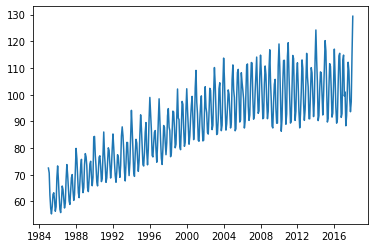

In [5]:
plt.plot(df.index, df.Value);

# How to decompose a Time Series into its components
It's possible to decompose a Time Series if you consider a serie as a combination additive or multiplicative combination of its components.

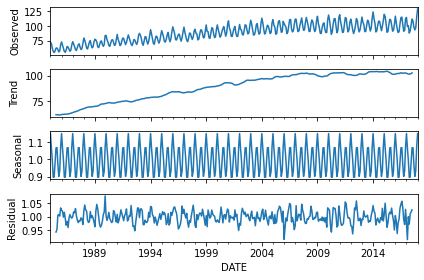

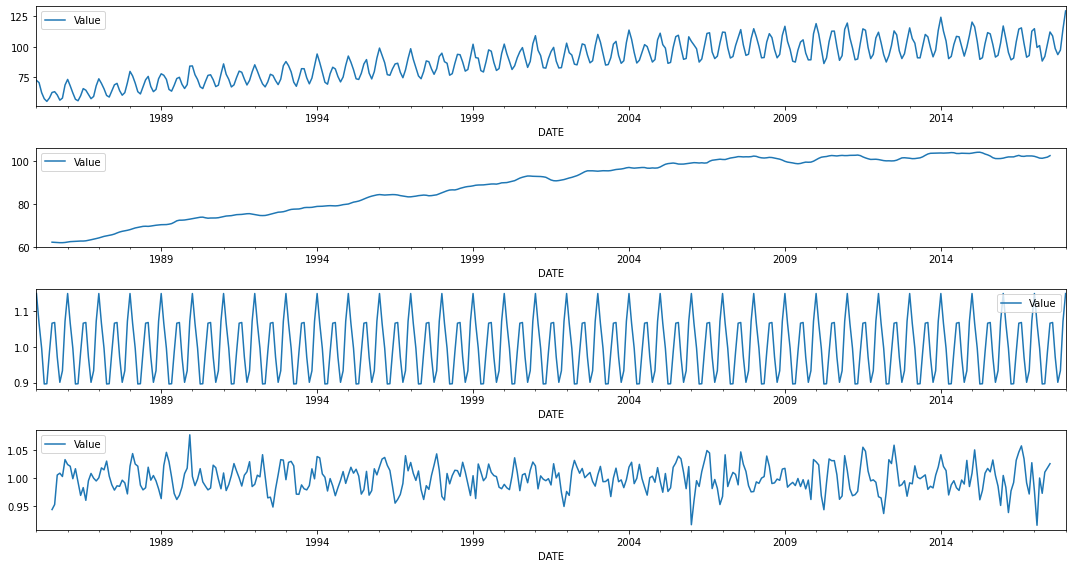

In [17]:
# LET'S DECOMPOSE AND SAVE IN "RESULT"
result = seasonal_decompose(df)

# PLOT RESULT
result.plot()

# BIGGER PLOT
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

# Exploratory Analisys and Features Extraction

we will use a dataset containing the data of an alleged railroad company that uses a new propulsion technology

In [36]:
railroad_dataset = "https://raw.githubusercontent.com/carlosfab/datasets/master/jetrail/jetrail.csv"

# IMPORT THE DATA FROM THE RAILROAD COMPANY.
df_train = pd.read_csv(railroad_dataset)

# THE FIRST 5 ENTRIES
df_train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


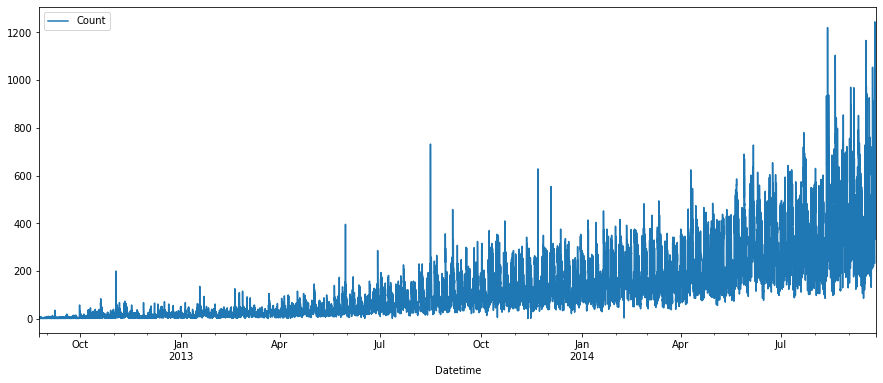

In [37]:
# CONVERT "DateTime" COLUMN TO DATETIME TYPE
df_train.Datetime = pd.to_datetime(df_train.Datetime, format="%d-%m-%Y %H:%M")

# PLOT 
fig, ax = plt.subplots(figsize=(15, 6))
df_train.plot(x="Datetime", y="Count", ax=ax);


# Hypotheses:

*   People travel more during the week.
*   There are peak times because of commuting to and from work.
*   There are periods in the month where the demand for transport is greatest.


In [49]:
# CREATE FEATURES TO EACH PERIOD
df_train['year'] = df_train.Datetime.dt.year
df_train['month'] = df_train.Datetime.dt.month
df_train['day_of_week'] = df_train.Datetime.dt.dayofweek
df_train['hour'] = df_train.Datetime.dt.hour

df_train.tail()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0



*   People travel more during the week


In [56]:
# CONVERT VARIABLES IN 0 OR 1
df_train['weekend'] = 0 
df_train.loc[(df_train.day_of_week == 5) | (df_train.day_of_week == 6), "weekend" ]= 1

In [50]:
# VERIFY THE VALUES WEEKEND VS WEEK
df_train.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

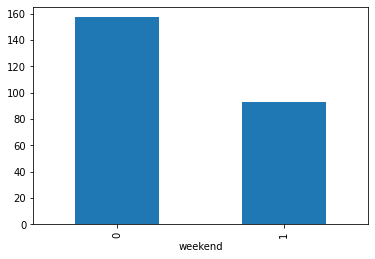

In [53]:
# PLOT THE VALUES WEEKEND VS WEEK
df_train.groupby('weekend').Count.mean().plot.bar();


*   There are peak time because of commuting to and from work



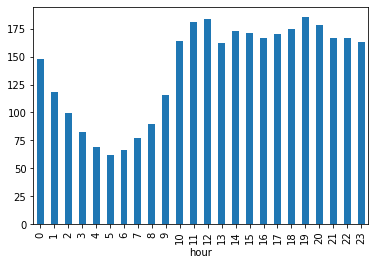

In [52]:
# COUNT BY HOURS
df_train.groupby('hour').Count.mean().plot.bar();



*   There are periods in the month where the demand for transport is greatest.




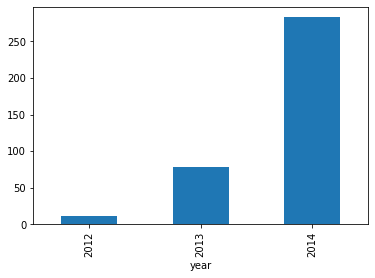

In [55]:
# COUNT BY MONTH
df_train.groupby('month').Count.mean().plot.bar();